# Importing LIbraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings;
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
df = pd.read_excel(r'Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,NaN,71053.0,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541908 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  float64       
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 33.1+ MB


In [4]:
num = df.select_dtypes(include='number')
char = df.select_dtypes(include='object')

In [5]:
num.head()

,Quantity,UnitPrice,CustomerID
0,6.0,2.55,17850.0
1,6.0,3.39,17850.0
2,8.0,2.75,17850.0
3,6.0,3.39,17850.0
4,6.0,3.39,17850.0


In [6]:
char.head()

,InvoiceNo,StockCode,Description,Country
0,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
1,NaN,71053.0,WHITE METAL LANTERN,United Kingdom
2,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom
3,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom
4,536365.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom


In [7]:
char['Cancellation'] = list(map(lambda x: 'yes' if str(x)[0] == 'C' else 'no',char['InvoiceNo']))

In [8]:
char.Country.value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [9]:
char['UK/!UK'] = list(map(lambda x: 'Yes' if x == 'United Kingdom' else 'No', char['Country'] ))

In [10]:
char['timeOfDay'] =df['InvoiceDate'].dt.hour 

In [12]:
char['timeOfDay'] = list(map(lambda x: 'Morning' if x >=5 and x<12
                         else('Afternoon' if x>=12 and x<18
                             else('Evening' if x>=18 and x<22
                                 else 'Night')),char['timeOfDay']))

In [13]:
char.timeOfDay.value_counts()

Afternoon    378983
Morning      150376
Evening       12550
Name: timeOfDay, dtype: int64

In [14]:
char['Month'] = (df['InvoiceDate'].dt.month_name(locale = 'English'))
char['Month'] = list(map(lambda x: x.lower()[:3], char['Month']))

In [16]:
char['quarter'] = list(map(lambda x:'Q1' if x in ['jan','feb','mar']
                       else ('Q2' if x in ['apr','may','jun']
                            else ('Q3' if x in ['jul','aug','sep'] else 'Q4')), char['Month']))

In [17]:
char['dayOfWeek'] = df['InvoiceDate'].dt.day_name()
char['dayOfWeek'] = list(map(lambda x: x.lower()[:3], char['dayOfWeek']))

In [18]:
num['weekofyear'] = df['InvoiceDate'].dt.isocalendar().week

In [19]:
num1=num.drop(['CustomerID'],axis='columns')

In [20]:
char1=char.drop(["InvoiceNo",'Description',"StockCode","Country"],axis='columns')

## One Hot Encoding

In [21]:
X_char_dum = pd.get_dummies(char1,drop_first=True)
X_char_dum.shape

(541909, 23)

## Scaling Independent data

In [24]:
scaler = StandardScaler()
num_scaled = pd.DataFrame(scaler.fit_transform(num1),index=num1.index,columns=num1.columns).add_suffix('_std')

In [25]:
df_all = pd.concat([num_scaled,X_char_dum],axis=1, join='inner')

In [26]:
df_all.head()

,Quantity_std,UnitPrice_std,weekofyear_std,Cancellation_yes,UK/!UK_Yes,timeOfDay_Evening,timeOfDay_Morning,Month_aug,Month_dec,Month_feb,...,Month_oct,Month_sep,quarter_Q2,quarter_Q3,quarter_Q4,dayOfWeek_mon,dayOfWeek_sun,dayOfWeek_thu,dayOfWeek_tue,dayOfWeek_wed
0,-0.016289,-0.021301,1.140281,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,-0.016289,-0.012620,1.140281,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,-0.007118,-0.019234,1.140281,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,-0.016289,-0.012620,1.140281,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
4,-0.016289,-0.012620,1.140281,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [37]:
df_all.isnull().sum()

Quantity_std         0
UnitPrice_std        0
weekofyear_std       0
Cancellation_yes     0
UK/!UK_Yes           0
timeOfDay_Evening    0
timeOfDay_Morning    0
Month_aug            0
Month_dec            0
Month_feb            0
Month_jan            0
Month_jul            0
Month_jun            0
Month_mar            0
Month_may            0
Month_nov            0
Month_oct            0
Month_sep            0
quarter_Q2           0
quarter_Q3           0
quarter_Q4           0
dayOfWeek_mon        0
dayOfWeek_sun        0
dayOfWeek_thu        0
dayOfWeek_tue        0
dayOfWeek_wed        0
clusterLable         0
dtype: int64

In [39]:
np.isinf(df_all).sum()

Quantity_std         0
UnitPrice_std        0
weekofyear_std       0
Cancellation_yes     0
UK/!UK_Yes           0
timeOfDay_Evening    0
timeOfDay_Morning    0
Month_aug            0
Month_dec            0
Month_feb            0
Month_jan            0
Month_jul            0
Month_jun            0
Month_mar            0
Month_may            0
Month_nov            0
Month_oct            0
Month_sep            0
quarter_Q2           0
quarter_Q3           0
quarter_Q4           0
dayOfWeek_mon        0
dayOfWeek_sun        0
dayOfWeek_thu        0
dayOfWeek_tue        0
dayOfWeek_wed        0
clusterLable         0
dtype: int64

# Creating Clustering Model

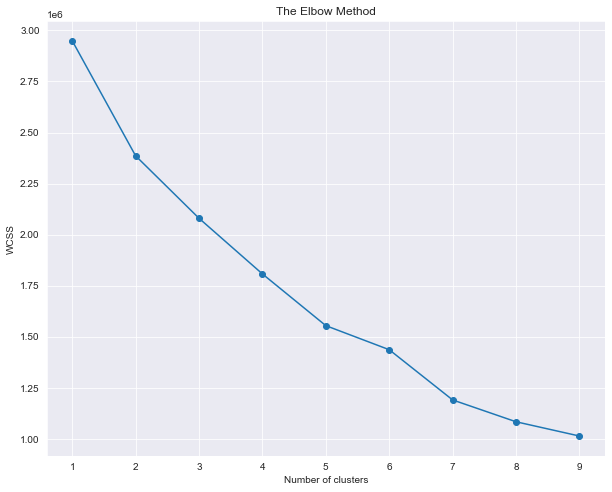

In [27]:
plt.figure(figsize=(10, 8))
wcss = []
K = range(1, 10)
for i in K:
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_all)
    wcss.append(kmeans.inertia_)
plt.plot(K, wcss,'o-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
kmeans = KMeans(n_clusters=6, init = 'k-means++', random_state=42)
kmeans_cluster = kmeans.fit_predict(df_all)

In [29]:
df_all['clusterLable'] = pd.DataFrame(kmeans_cluster)

In [31]:
df_all.shape

(541909, 27)

In [33]:
num['clusterlabel'] = df_all['clusterLable']

In [34]:
num.clusterlabel.value_counts()

0    213446
3    125022
5    103813
2     99595
1        31
4         2
Name: clusterlabel, dtype: int64

In [35]:
dataset = pd.concat([num,char],axis=1,join='inner')

In [40]:
dataset.to_csv('Clustered_Online_Retail.csv')

- CLuster 0 -> AVG Qty 8 | Q4 | international demand | 1.57% cancel | thru out the day AND week 
- CLuster 1 -> Returns
- CLuster 2 -> AVG Qty 8 | Q1 | international demand | 1.87% cancel | thru out the day AND week 
- CLuster 3 -> AVG Qty 10 | Q3 | international demand | 1.72% cancel | thru out the day AND week
- CLuster 4 -> Bulk order
- CLuster 5 -> AVG Qty 10 | Q2 | international demand | 1.81% cancel | thru out the day AND week

In [43]:
values = [1,4]
dataset1 = dataset[dataset['clusterlabel'].isin(values) == False]

In [44]:
dataset1.clusterlabel.value_counts()

0    213446
3    125022
5    103813
2     99595
Name: clusterlabel, dtype: int64